<a href="https://colab.research.google.com/github/altnsksema/Script-Recognition-/blob/main/El_Yaz%C4%B1s%C4%B1_Rakamlar%C4%B1_S%C4%B1n%C4%B1fland%C4%B1rma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(f"Train set shape: {X_train.shape}, Test set shape: {X_test.shape}")
print(f"Label örnekleri: {y_train[:5]}")

Train set shape: (60000, 28, 28), Test set shape: (10000, 28, 28)
Label örnekleri: [5 0 4 1 9]


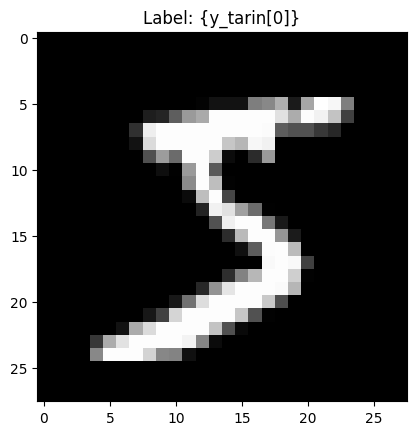

In [ ]:
plt.imshow(X_train[0], cmap= 'gray')
plt.title("Label: {y_tarin[0]}")
plt.show()

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
print(f"New Label Shape: {y_train.shape}")

New Label Shape: (60000, 10)


In [ ]:
model =  Sequential([Flatten(input_shape=(28, 28)),
                     Dense(128, activation = 'relu'),
                     Dense(10, activation = 'softmax')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train,
                    validation_split = 0.2,
                    epochs= 10,
                    batch_size = 32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8671 - loss: 0.4678 - val_accuracy: 0.9592 - val_loss: 0.1516
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9596 - loss: 0.1329 - val_accuracy: 0.9666 - val_loss: 0.1137
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9739 - loss: 0.0867 - val_accuracy: 0.9711 - val_loss: 0.0946
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9821 - loss: 0.0608 - val_accuracy: 0.9726 - val_loss: 0.0901
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9866 - loss: 0.0445 - val_accuracy: 0.9730 - val_loss: 0.0890
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9902 - loss: 0.0342 - val_accuracy: 0.9747 - val_loss: 0.0853
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9927 - loss: 0.0254 - val_accuracy: 0.9743 - val_loss: 0.0891
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9943 - loss: 0.0201 -

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Doğruluğu: {test_acc: .2f}")

Test Doğruluğu:  0.98


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


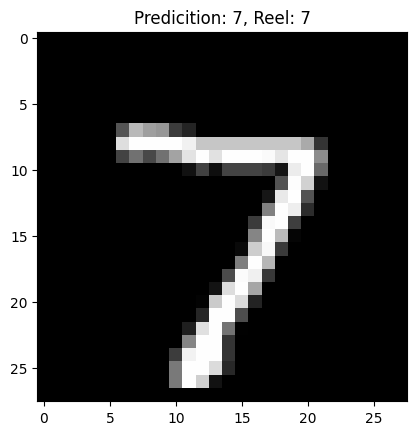

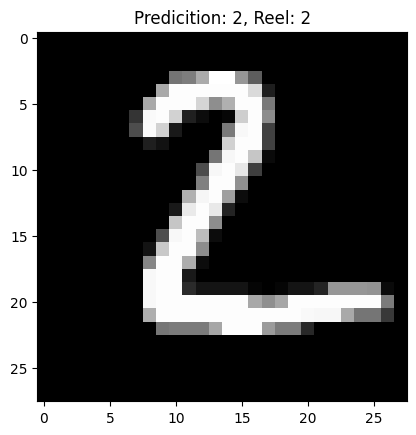

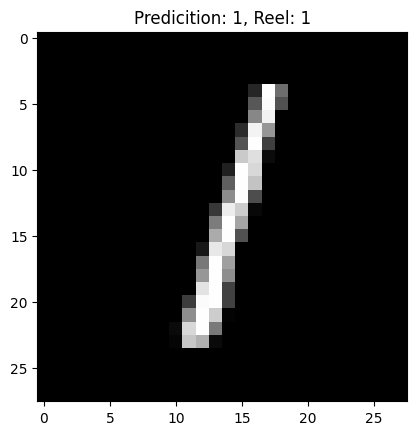

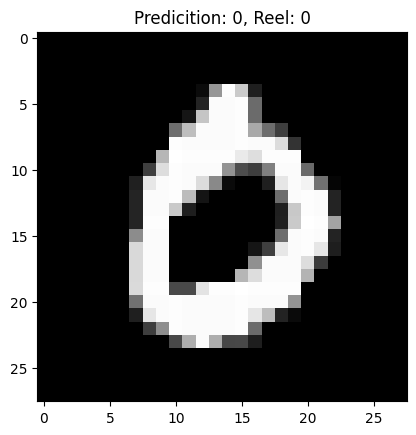

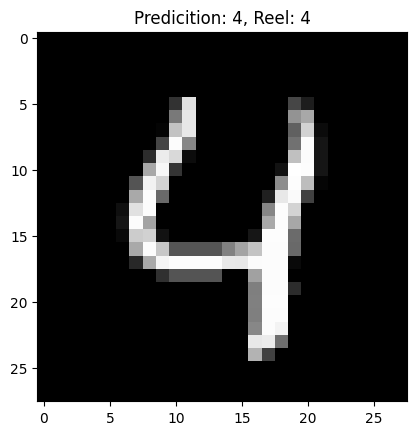

In [ ]:
predictions = model.predict(X_test[:5])

for i in range (5):
  plt.imshow(X_test[i], cmap='gray')
  plt.title(f"Predicition: {np.argmax(predictions[i])}, Reel: {np.argmax(y_test[i])}")
  plt.show()